# Алгоритм поиска ассоциативных правил

Задание: Исследовать данные на наличие ассоциативных правил алгоритмом Ariori. Подобрать значения Supp и Сonf. Интерпретировать полученные результаты.

Алгоритм Apriori является одним из самых широко используемых алгоритмов поиска ассоциативных правил. **Негласно считается, что это первый алгоритм, который надо попробовать при решении задачи добычи данных(data mining).** Кроме алгоритма Apriori на сегодняшний день известны и другие алгоритмы поиска ассоциативных правил: Eclat, алгоритм FP-роста, AprioriDP, OPUS и др. Иногда к группе данных алгоритмов причисляют алгоритмы семейства SlopeOne.

Алгоритмы поиска ассоциативных правил нашли широкое распространение при построении экспертных систем, однако кроме этого часто используются и в практической деятельности в сфере торговли (при раскладке товаров: считается, что товары, которые часто покупаются вместе, надо размещать ближе друг к другу).

### Анализ рыночной корзины с использованием алгоритма Априори в машинном обучении

В основе Apriori — поиск частотных множеств элементов в наборе данных. Этот алгоритм построен на ассоциациях и корреляциях между наборами элементов. Он применяется на рекомендательных платформах — там, где мы обычно видим фразу *«Вам также может понравиться»*.

![image-2.png](https://i.pinimg.com/564x/55/2b/f9/552bf9bf2c70bd508249bbc9254d4f2b.jpg)

*[Источник](https://pin.it/6nEUETn)*

#### Ассоциативные правила

Алгоритм Apriori генерирует ассоциативные правила для набора данных. Ассоциативное правило подразумевает, что если в наборе содержится элемент X, то элемент Y будет содержаться в этом наборе с определённой вероятностью.

В алгоритме Apriori предполагается, что любое подмножество частотного набора элементов должно быть частотным. Например, если транзакция {молоко, яйца, хлеб} частотна, должна быть частотной и ее составляющая {яйца, хлеб}.

#### Пример

|Транзакция |	Элементы |
|-----------|------------|
|t1	        |   {Яблоки, молоко, хлеб}|
|t2	        |	{Яблоки, бананы}|
|t3	        |	{Бананы, конфеты}|
|t4	        |	{Яблоки, хлеб, бананы}|
|t5	        |	{Яблоки, молоко, хлеб,  бананы, конфеты}|
|t6	        |	{Молоко, хлеб, конфеты}|
|t7	        |	{Хлеб, бананы, конфеты}|

В данной таблице мы видим 7 транзакций из продуктового магазина. В строке каждой транзакции представлены купленные продукты. Всё множетсво продуктов может быть представлено в виде:
$$ I = \{i_1, i_2, ..., i_k\}$$
В нашем случае:$ I = \{Яблоки, молоко, хлеб,  бананы, конфеты\}$

Одна транзакция может быть представлена в виде:
$$ T = \{t_1, t_2, ..., t_n\}$$

Например,
$T = \{Яблоки, молоко, хлеб\}$

Ассоциативное правило определяется следующим образом:
$$X⇒Y, где X⊂I, Y⊂I и X∩Y=0$$

Например, $\{Яблоки, молоко\}⇒\{Хлеб\}$



### Принцип работы Apriori

Чтобы из всего многообразия правил отобрать интересные, для примера супермаркета применим следующие показатели:

- **поддержка**;
Поддержка элемента x — это не что иное, как отношение числа транзакций с товаром x к общему числу транзакций.

$$ Support(X⇒Y) = \frac{Frequency(X, Y)}{N}$$

Например, $Support(Яблоки⇒Бананы) = \frac{3}{7} = 43%$

- **доверие**;
Доверием (X⇒Y) обозначают вероятность покупки товара y при покупке товара x. В этом методе учитывается популярность товара x.

$$ Confidence(X⇒Y) = \frac{Frequency(X, Y)}{Frequency(X)}$$

Например, $Confidence(Яблоки⇒Бананы) = \frac{4/7}{5/7} = 80% $

- **лифт**;
Лифт (X⇒Y) — это отношение между наблюдаемой поддержкой и ожидаемой моддержкой X и Y, если бы они были независимыми.

$$Lift(X⇒Y) = \frac{Support(X⇒Y)}{Support(X) * Support(Y)}$$

Если лифт (X⇒Y) = 1, то корреляции в наборе товаров нет.

Если лифт (X⇒Y) > 1, корреляция в наборе товаров положительная, то есть вероятность совместной покупки товаров x и y выше.

Если лифт (X⇒Y) < 1, корреляция в наборе товаров отрицательная, то есть совместная покупка товаров x и y маловероятна.

Например, $lift(Яблоки⇒Бананы) = \frac{3/7}{4/7 * 4/7} = 1,3125$

- **уверенность**(conviction). Уверенность правила определяется так:

$$Conviction(X⇒Y) = \frac{1 - support(Y)}{1 - confidence(X⇒Y)}$$

Его можно интерпретировать как отношение ожидаемой частоты возникновения X без Y, если X и Y независимы, к наблюдаемой частоте неправильных предсказаний.

Если уверенность (X ⇒ Y) = 1, то между x и y связи нет.
В правиле чем выше уверенность, тем выше интерес.

Например, $conviction(Яблоки⇒Бананы) = \frac{1 - 4/7}{1-4/5} = 1,43$

*Основная цель анализа рыночной корзины в маркетинге* – предоставить розничному продавцу информацию, необходимую для понимания покупательского поведения, и это может помочь розничному продавцу принять неправильные решения.

#### Проанализируем данные потребительской корзины:

Dataset: DataSet_france.csv

InvoiceNo: 6-тизначный номер, назначенный для каждой транзакции.

StockCode: 5-тизначный номер продукта в системе.

Description: Название продукта.

Quantity: Количества продукта в транзакции.

InvoiceDate: Дата и время покупки.

UnitPrice: Цена продукта.

CustomerID: 5-тизначный номер покупателя.

Country: Название страны, откуда произошла покупка.

In [ ]:
# для решения нашей задачи будем использовать библиотеку mlxtend(machine learning extensions)
%pip install mlxtend

In [1]:
# Подгрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
#посмотрим на данные
data = pd.read_csv('./DataSet_france.csv')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


Проверим качество данных и, при необходимости, почистим:

In [ ]:
# data['InvoiceNo'] = data['InvoiceNo'].astype('int')

Посмотрим на ТОП-10 самых продаваемых товаров

/tmp/ipykernel_8442/1985477342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x.index, y= x.values, palette='rocket')


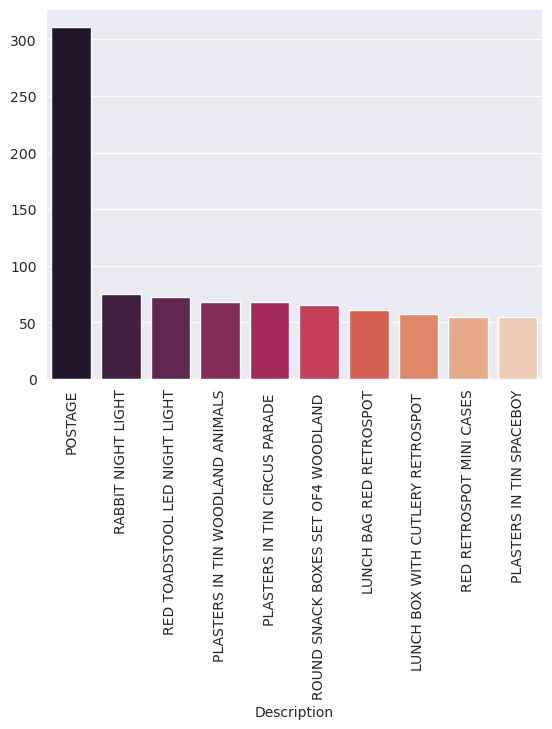

In [3]:
x = data['Description'].value_counts().sort_values(ascending=False)[:10]
sns.set_style('darkgrid')
sns.barplot(x = x.index, y= x.values, palette='rocket')
plt.xticks(rotation=90)
plt.show()

Теперь наши данные достаточно очищены для дальнейшей работы с ними.

Для обработки наших данных алгоритмом Apriori в Python, нужно создать список транзакций, как в примере в начале практики.

Создадим матрицу, в которой заказы будут перегруппированы по номерам инвойсов(транзакций).
Если товар есть в транзакции, в таблице будет стоять 1, если нет, в таблице будет 0.

In [ ]:
# помимо показанного выше, добавим ещё одно действие - конвертируем таблицу в логический тип данных
data_for_apriori = data.groupby(['InvoiceNo', 'Description'])['UnitPrice'].sum().unstack().fillna(0). \
                 map(lambda x: 1 if x > 0 else 0)

data_for_apriori.head()

Рассчитаем значения поддержки(support) для каждой возможной конфигурации элементов (порог поддержки выбран 0,01 (1%))

In [ ]:
frequent_itemsets = apriori(data_for_apriori.astype('bool'), min_support=0.01, use_colnames=True)
frequent_itemsets.head()

А теперь создадим правила и посмотрим некоторые из них:

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

rules.sort_values("support", ascending=False).tail(5)

In [ ]:
# выведем результаты с определёнными параметрами
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False).head(5)

#### Пример использования правил
Представим, что мы работаем в этом Интернет-магазине и хотим создать рекомендательную систему для покупателей. Для этого создадим функцию, которая по названию товара возвращает рекомендуемые товары(по умолчанию - 5 штук):

In [ ]:
def recommend_product(rules, product_name, num_of_products=5):
    sorted_rules = rules.sort_values("support", ascending=False)
    recommendation_list = []
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):

            if j == product_name:
                recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                recommendation_list = list( dict.fromkeys(recommendation_list) )
    return(recommendation_list[0:num_of_products])

Теперь мы можем передать в функцию товар, попавший в корзину, и выдать рекомендации:

In [ ]:
recommend_product(rules, ('SET/6 RED SPOTTY PAPER PLATES'))

Рекомендательные системы - яркий пример использования ассоциативных правил. Однако, это не единственная область их применения.
Помимо применения  в маркетинге (адресная рассылка (direct mail), кросс-продажи), этот алгоритм можно применять и к анализу данных, для проверки их на "чистоту" и отсутствие внутренних зависимостей.